# Random Variables \& Probability Distribution Functions
## Some Discrete distributions

### Discrete Uniform Distribution

In [17]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def roll_dice(n):
    """
    Roll a fair six-sided die n times, plot relative frequencies,
    and return a list [f1,…,f6] with those frequencies.
    """
    faces  = [1, 2, 3, 4, 5, 6]
    counts = [0] * 6                       

    for _ in range(n):                     
        r = random.randint(1, 6)
        counts[r - 1] += 1                 

    rel_freq = [c / n for c in counts]     

    # --- bar chart ---
    plt.bar(faces, rel_freq, tick_label=faces)
    plt.xlabel("Die face")
    plt.ylabel("Relative frequency")
    plt.ylim(0, 1/3)
    plt.title(f"Relative Frequencies for {n} Rolls")
    plt.show()

    return rel_freq

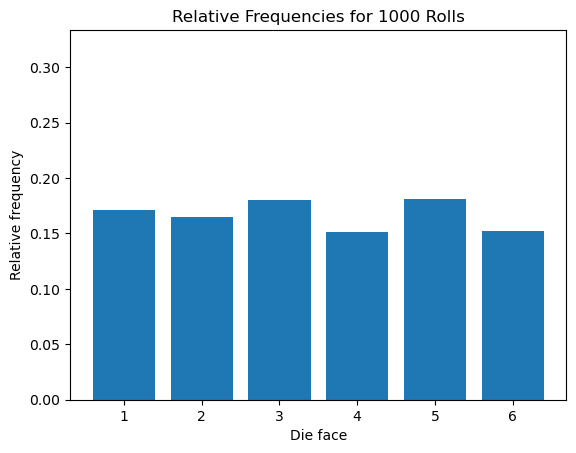

[0.171, 0.165, 0.18, 0.151, 0.181, 0.152]

In [22]:
roll_dice(1000)

### Bernoulli Distribution

In [24]:
def toss_coins(n, p=0.75):
    """
    Simulate n Bernoulli trials (coin tosses) with success-probability p.
    Plot a bar chart of relative frequencies and return [p_tail, p_head].
    """
    # counts[0] = tails, counts[1] = heads
    counts = [0, 0]

    for _ in range(n):
        outcome = 1 if random.random() < p else 0
        counts[outcome] += 1

    rel_freq = [c / n for c in counts]

    # --- bar chart ---
    labels = ["Tails (0)", "Heads (1)"]
    plt.bar(labels, rel_freq)
    plt.ylabel("Relative frequency")
    plt.ylim(0, 1)
    plt.title(f"{n} Coin Tosses (p = {p})")
    plt.show()

    return rel_freq


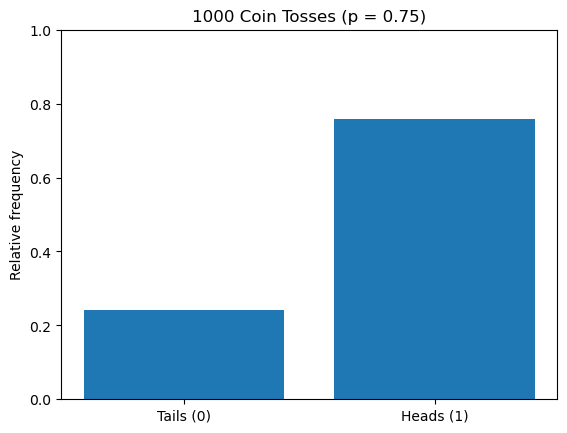

[0.241, 0.759]

In [26]:
toss_coins(1000)

### Binomial Distribution

In [47]:
def simulate_binom(n_trials=1000, n=10, p=0.5):
    """
    Draw n_trials samples from Binomial(n, p),
    plot a normalized histogram, and return the sample array.
    """
    samples = np.random.binomial(n, p, size=n_trials)
    
    plt.hist(samples, density=True, rwidth=0.8)
    plt.xlabel("Number of successes (k)")
    plt.ylabel("Relative frequency")
    plt.title(f"Histogram of Binomial({n}, {p}) — {n_trials:,} samples")
    plt.xticks(range(n + 1))
    plt.show()
    

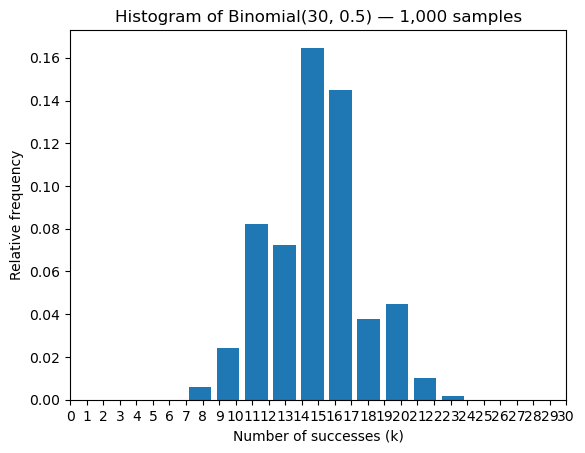

In [49]:
simulate_binom(1000, 30, 0.5)

## Continuous Distributions

### Normal Distribution

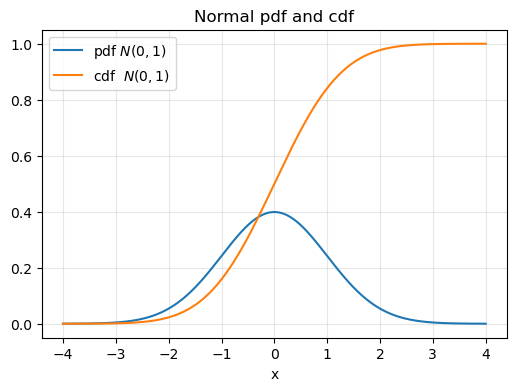

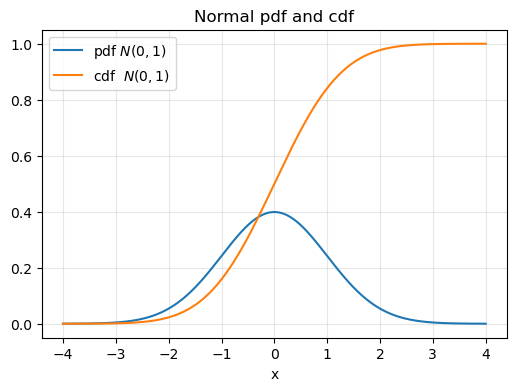

In [28]:
from scipy.stats import norm         # part of SciPy

mu, sigma = 0, 1                     # mean, std. dev.
xs = np.linspace(mu - 4*sigma, mu + 4*sigma, 400)

plt.figure(figsize=(6,4))
plt.plot(xs, norm.pdf(xs, mu, sigma),  label=r"pdf $N(0,1)$")
plt.plot(xs, norm.cdf(xs, mu, sigma),  label=r"cdf  $N(0,1)$")
plt.xlabel("x")
plt.title("Normal pdf and cdf")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [63]:
# Computing probabilities with Normal distribution
mu, sigma = 175, 7
print("P(X>185)     =", 1 - norm.cdf(185, mu, sigma))
print("P(160<=X<=190)=", norm.cdf(190, mu, sigma) -norm.cdf(160, mu, sigma))

P(X>185)     = 0.07656372550983481
P(160<=X<=190)= 0.9678754287923435


### Student-t Distribution

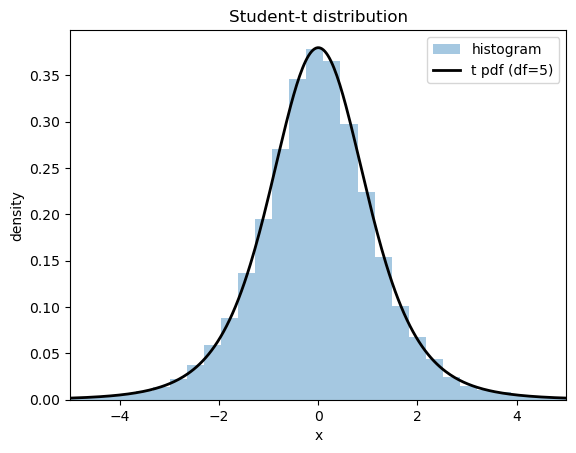

In [72]:
from scipy.stats import t

df = 5                     
samples = np.random.standard_t(df, size=20_000)

xs = np.linspace(-6, 6, 400)
plt.hist(samples, bins=60, density=True, alpha=0.4, label="histogram")
plt.plot(xs, t.pdf(xs, df), "k-", lw=2, label=f"t pdf (df={df})")
plt.title("Student-t distribution")
plt.xlim(-5,5)
plt.xlabel("x")
plt.ylabel("density")
plt.legend()


## Multivariate Distributions

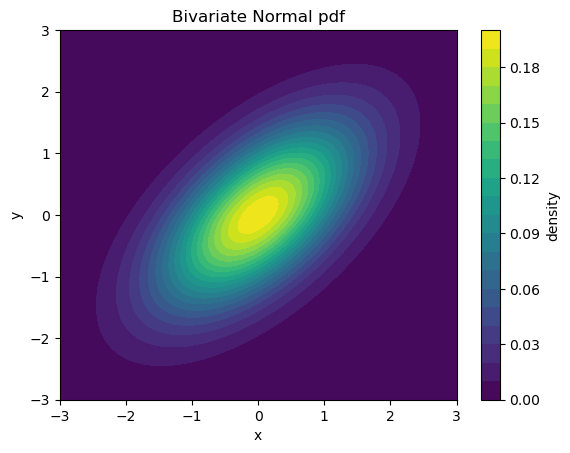

In [25]:
from scipy.stats import multivariate_normal
%matplotlib inline

mean = [0, 0]
cov  = [[1, 0.6], [0.6, 1]]

# grid over which to evaluate
x = np.linspace(-3, 3, 120)
y = np.linspace(-3, 3, 120)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

rv = multivariate_normal(mean, cov)
Z = rv.pdf(pos)

plt.contourf(X, Y, Z, levels=20, cmap="viridis")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Bivariate Normal pdf")
plt.colorbar(label="density")
plt.show()

In [3]:
from mpl_toolkits.mplot3d import Axes3D      # 3-D tools
from scipy.stats import multivariate_normal
%matplotlib qt
# parameters of the distribution
mean = [0, 0]
cov  = [[1, 0.6],
        [0.6, 1]]

# grid of (x, y) values
x = np.linspace(-3, 3, 120)
y = np.linspace(-3, 3, 120)
X, Y = np.meshgrid(x, y)
pos  = np.dstack((X, Y))

# evaluate the pdf
rv = multivariate_normal(mean, cov)
Z  = rv.pdf(pos)

# --- 3-D surface plot ---
fig = plt.figure(figsize=(6,4))
ax  = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis", linewidth=0, antialiased=True)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("density")
ax.set_title("Bivariate Normal pdf (sigma_1=sigma_2=1, rho=0.6)")
plt.tight_layout()
plt.show()

In [26]:
%matplotlib inline